# 🏠 Mini-Project: Preprocess & Engineer Features on Ames Housing Dataset

> **Goal: Work with the [Ames Housing dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?select=AmesHousing.csv) to perform data preprocessing and create meaningful new features. You will:**
> - Handle **missing values**, **duplicates**, and **outliers**  
> - Detect and fix **skewness** in numerical features  
> - Encode categorical variables into numeric formats  
> - Create **non-linear features** (e.g., polynomial, log, interaction terms) from existing variables  
> - Save the cleaned and enriched dataset into a new CSV file  

<p align="center">📢⚠️📂</p>

<p align="center"> Please name your file using the format: <code>assignmentName_nickname.py/.ipynb</code> (e.g., <code>project2_rezashokrzad.py</code>) and push it to GitHub with a clear commit message.</p>

<p align="center"> 🚨📝🧠</p>


## 🔹 Step 1: Load the Dataset


In [203]:
# TODO: Load the Ames Housing dataset into a DataFrame.
# Hint: The dataset is available on Kaggle ("Ames Housing").
# After loading, display the first and last 5 rows to check if it worked.

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "AmesHousing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prevek18/ames-housing-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

pd.set_option('display.max_columns', None)

print("First 5 records:", df.head())
print("Last 5 records:", df.tail())

C:\Users\Parastoo\AppData\Local\Temp\ipykernel_11092\867328322.py:15: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Sty

## 🔹 Step 2: Exploratory Data Review (EDR)

In [204]:
# TODO: Perform initial exploration of the dataset.
# - Check shape, column names, smaples
# - Get summary info, data types
# - Descriptive statistics

print(f"Shape: {df.shape}")
print(f"Columns Name: {df.columns}")
print(f"Sample of Records: {df.sample}")

df.info()
df.dtypes

print(df.describe())
print(df.describe(include='object'))

for col in df.columns:
    print(f"{col}: {df[col].unique()}")

print(df.nunique())

Shape: (2930, 82)
Columns Name: Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garag

## 🔹 Step 3: Missing Value Check & Handling

In [205]:
# TODO: Check missing values.
# Decide on a strategy (if needed):
# - Drop if too many are missing
# - Fill with mean/median/mode/domain-specific value

print("First shape: ", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after drop dupl.: ", df.shape)

if 'Order' in df.columns:
    df.drop(columns=['Order'], inplace=True)
if 'PID' in df.columns:
    df.drop(columns=['PID'], inplace=True)
print("# of nulls at the begining: ", df.isnull().sum().sum())

# list columns with missing values
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)
# drop columns with more than 50% missing values
missing_pct = df.isnull().mean() * 100
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
df = df.drop(columns=cols_to_drop)
print("Shape after drop columns with >50% missing values: ", df.shape)
print("# of nulls after drop columns with >50% missing values: ", df.isnull().sum().sum())

col_cat = df.select_dtypes(include='object').columns
col_num = df.select_dtypes(exclude='object').columns
for col in col_num:
    df[col] = df[col].fillna(df[col].median())
print("# of nulls before Categurical filling: ", df.isnull().sum().sum())
for col in col_cat:
    mod = df[col].mode()
    mode_value = mod.iloc[0]        # pick the first mode
    df[col] = df[col].fillna(mode_value)
print("# of nulls at the end: ",df.isnull().sum().sum())


First shape:  (2930, 82)
Shape after drop dupl.:  (2930, 82)
# of nulls at the begining:  15749
Shape after drop columns with >50% missing values:  (2930, 75)
# of nulls after drop columns with >50% missing values:  3143
# of nulls before Categurical filling:  2461
# of nulls at the end:  0


## 🔹 Step 4: Correlation Check & Feature Decision

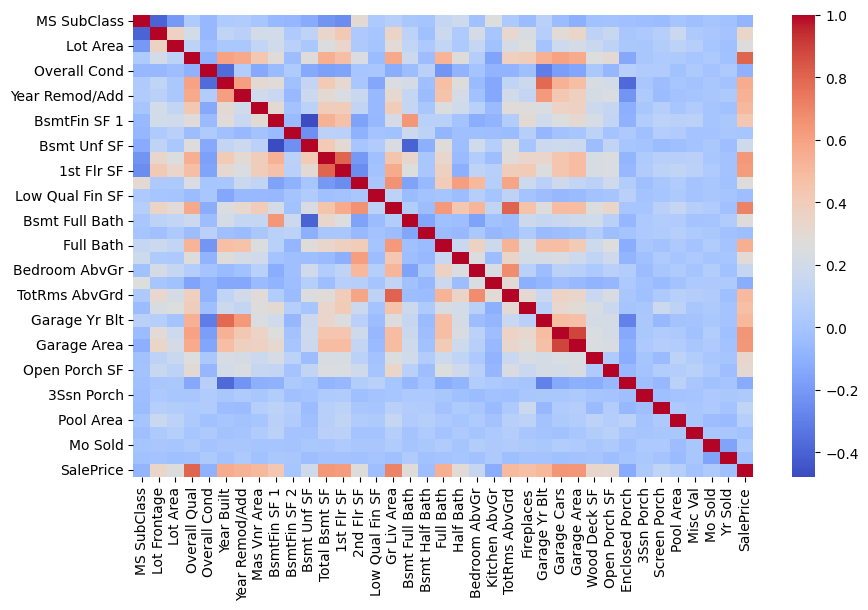

Dataset's shape before correlation drops: (2930, 75)
Dataset's shape after correlation drops: (2930, 73)


In [ ]:
# TODO: Check correlations between numerical features and target variable (SalePrice).
# Use correlation heatmap or pairplot.
# Decide which features to keep/remove based on correlation.

import seaborn as sns
import matplotlib.pyplot as plt

# Numeric-only correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm")
plt.show()

# determining the dropping columns 
threshold = 0.7
i = -1
to_drop = []
for rw in corr['SalePrice']:
    i += 1
    if corr['SalePrice'].abs().iloc[i] > threshold:
        if corr.columns[i] != 'SalePrice':
            to_drop.append(corr.columns[i])
print(f"Dataset's shape before correlation drops: {df.shape}")
df1 = df.copy()
df1.drop(columns=to_drop, inplace=True)
print(f"Dataset's shape after correlation drops: {df1.shape}")

## 🔹 Step 5: Encode Categorical Variables

In [66]:
# TODO: Identify categorical variables.
# Use methods like:
# - One-hot encoding
# - Ordinal encoding
# Decide what makes sense for each feature.

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# for col in col_cat:
#     print(df[col].unique())

df_oe = df.copy()  # keep a separate version
ordinal_encoders = {}
for col in col_cat:
    oe = OrdinalEncoder()
    df_oe[col] = oe.fit_transform(df_oe[col].values.reshape(-1, 1))
    ordinal_encoders[col] = oe  # store encoder if needed later
print(df_oe.head())

df_ohe = df.copy()  # keep a separate version
label_encoders = {}
ohe = OneHotEncoder(drop="first", sparse_output=False) # Set sparse_output to False
encoded = ohe.fit_transform(df_ohe[col_cat])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(col_cat), index=df_ohe.index)
df_ohe = pd.concat([df_ohe.drop(columns=col_cat), encoded_df], axis=1)

print(df_ohe.head())


   MS SubClass  MS Zoning  Street  Lot Shape  Land Contour  Utilities  \
0           20        5.0     1.0        0.0           3.0        0.0   
1           20        4.0     1.0        3.0           3.0        0.0   
2           20        5.0     1.0        0.0           3.0        0.0   
3           20        5.0     1.0        3.0           3.0        0.0   
4           60        5.0     1.0        0.0           3.0        0.0   

   Lot Config  Land Slope  Neighborhood  Condition 1  Condition 2  Bldg Type  \
0         0.0         0.0          15.0          2.0          2.0        0.0   
1         4.0         0.0          15.0          1.0          2.0        0.0   
2         0.0         0.0          15.0          2.0          2.0        0.0   
3         0.0         0.0          15.0          2.0          2.0        0.0   
4         4.0         0.0           8.0          2.0          2.0        0.0   

   House Style  Overall Qual  Overall Cond  Roof Style  Roof Matl  \
0          

## 🔹 Step 6: Feature Scaling

In [69]:
# TODO: Try different scaling techniques:
# - StandardScaler
# - MinMaxScaler
# - RobustScaler
# Decide based on the distribution of features.

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
df_ss = df.copy()
df_mm = df.copy()
df_rs = df.copy()

scaler = StandardScaler()
df_ss[col_num] = scaler.fit_transform(df_ss[col_num])
print(df_ss.head())

scaler = MinMaxScaler()
df_mm[col_num] = scaler.fit_transform(df_mm[col_num])
print(df_mm.head())

scaler = RobustScaler()
df_rs[col_num] = scaler.fit_transform(df_rs[col_num])
print(df_rs.head())


   MS SubClass MS Zoning Street Lot Shape Land Contour Utilities Lot Config  \
0    -0.876682        RL   Pave       IR1          Lvl    AllPub     Corner   
1    -0.876682        RH   Pave       Reg          Lvl    AllPub     Inside   
2    -0.876682        RL   Pave       IR1          Lvl    AllPub     Corner   
3    -0.876682        RL   Pave       Reg          Lvl    AllPub     Corner   
4     0.061542        RL   Pave       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  \
0        Gtl        NAmes        Norm        Norm      1Fam      1Story   
1        Gtl        NAmes       Feedr        Norm      1Fam      1Story   
2        Gtl        NAmes        Norm        Norm      1Fam      1Story   
3        Gtl        NAmes        Norm        Norm      1Fam      1Story   
4        Gtl      Gilbert        Norm        Norm      1Fam      2Story   

   Overall Qual  Overall Cond Roof Style Roof Matl Exterior 1st Exterior 2

## 🔹 Step 7: Feature Selection & Feature Creation 💡

In [ ]:
# TODO: Select the most useful features.
# Try:
# - Correlation thresholding and Removing highly collinear features
# - decide yourself for dropping useless ones



In [ ]:
# TODO: Create at least 2 NEW features.
# Examples:
# - Age of house: df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
# - Interaction: df["Quality_x_Size"] = df["OverallQual"] * df["GrLivArea"]
# - Non-linear: df["Log_LotArea"] = np.log1p(df["LotArea"])



## 🔹 Step 8: Outlier Handling

In [ ]:
# TODO: Detect and handle outliers.
# Methods:
# - IQR rule
# - Z-score
# - Visualization (boxplots, scatterplots)



## 🔹 Step 9: Skewness Handling

In [ ]:
# TODO: Check skewness of numerical features.
# Apply log, sqrt, Box-Cox, or Yeo-Johnson depending on distribution.



## 🔹 Step 10: Remove Duplicates

In [ ]:
# TODO: Check and remove duplicate rows if there is.

# count duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

# (optional) inspect some duplicate rows
if dup_count:
    display(df[df.duplicated(keep=False)].head())

# drop duplicates (keep first occurrence) and reset index
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(f"Rows after dropping duplicates: {len(df)})


## 💾 Step 11: Save Cleaned Dataset

In [ ]:
# Save your final cleaned and engineered dataset to CSV.
df.to_csv("AmesHousing_engineered.csv", index=False)
print("✅ Cleaned dataset saved successfully!")
